In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read pizzas data from CSV
pizzas_df = pd.read_csv('../data/pizza_recipes.csv')

# Read ingredients data from CSV
ingredients_df = pd.read_csv('../data/calories.csv')


In [80]:
# Merge pizzas_df with ingredients_df to get calories per dough ingredient
pizzas_with_calories = pizzas_df.merge(ingredients_df, left_on='dough', right_on='ingredient', how='left')
pizzas_with_calories = pizzas_with_calories.rename(columns={'calories_per_100g': 'dough_calories'}).drop(columns=['ingredient'])

# Merge again for sauce
pizzas_with_calories = pizzas_with_calories.merge(ingredients_df, left_on='sauce', right_on='ingredient', how='left')
pizzas_with_calories = pizzas_with_calories.rename(columns={'calories_per_100g': 'sauce_calories'}).drop(columns=['ingredient'])


In [81]:
# Calculate total calories for toppings
toppings_calories = []
for toppings_list in pizzas_with_calories['toppings'].str.split(', '):
    total_toppings_calories = 0
    for topping in toppings_list:
        if topping in ingredients_df['ingredient'].values:
            topping_calories = ingredients_df.loc[ingredients_df['ingredient'] == topping, 'calories_per_100g'].values[0]
            total_toppings_calories += topping_calories
    toppings_calories.append(total_toppings_calories)

# Add toppings_calories to pizzas_with_calories DataFrame
pizzas_with_calories['toppings_calories'] = toppings_calories

print(pizzas_with_calories.head(2).to_string(index=False))

      name       dough        sauce              toppings                                 preparation                 cooking  temperature  time  dough_calories  sauce_calories  toppings_calories
Margherita Basic dough Tomato sauce     Mozzarella, Basil Roll out dough, spread sauce, add toppings. Bake for 10-12 minutes.          220    12             240              30                270
 Pepperoni Basic dough Tomato sauce Mozzarella, Pepperoni Roll out dough, spread sauce, add toppings. Bake for 10-12 minutes.          220    12             240              30                550


In [82]:
selected_columns= pizzas_with_calories[['name', 'dough_calories', 'sauce_calories', 'toppings_calories']]
print(selected_columns.to_string(index=False))

                name  dough_calories  sauce_calories  toppings_calories
          Margherita             240              30                270
           Pepperoni             240              30                550
         BBQ Chicken             240             150                500
          Vegetarian             240              30                390
            Hawaiian             240              30                450
             Supreme             240              30                970
        Meat Lover's             240              30                830
  Mushroom & Truffle             240             200                701
         Four Cheese             240             180                855
 Spinach & Artichoke             240             180                751
     Buffalo Chicken             240             150                790
     Pesto & Chicken             240             120                610
               Greek             240              80            

In [92]:
pizzas_with_calories['total_calories'] = (
    pizzas_with_calories['dough_calories'] +
    pizzas_with_calories['sauce_calories'] +
    pizzas_with_calories['toppings_calories']
)

pizzas_with_calories=pizzas_with_calories.sort_values(by='total_calories')

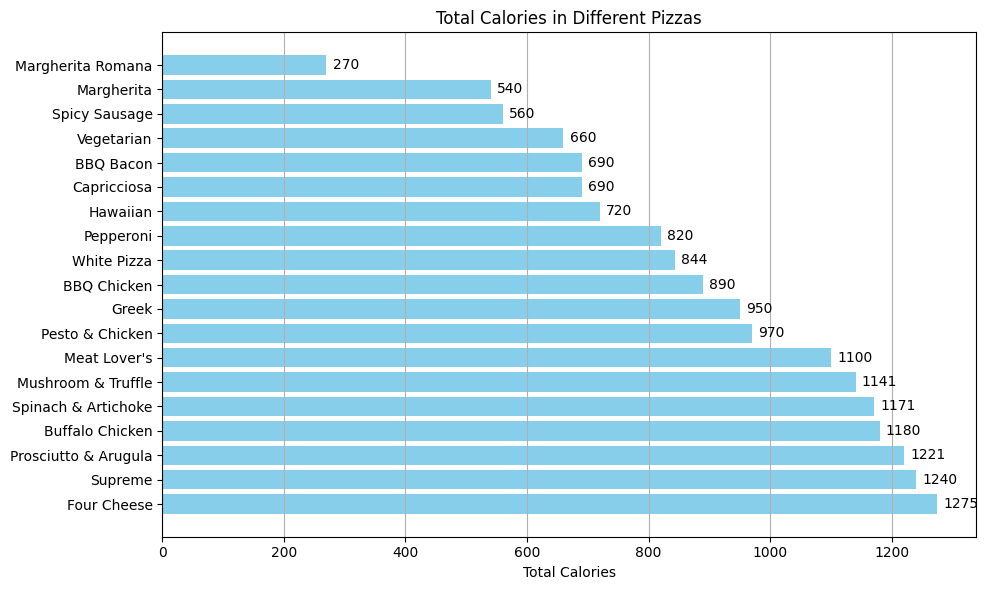

In [93]:
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(pizzas_with_calories['name'], pizzas_with_calories['total_calories'], color='skyblue')
plt.xlabel('Total Calories')
plt.title('Total Calories in Different Pizzas')
plt.gca().invert_yaxis()  # Invert y-axis to show highest calorie pizza at the top
plt.grid(axis='x')

# Annotate each bar with the calorie value
for index, value in enumerate(pizzas_with_calories['total_calories']):
    plt.text(value + 10, index, str(value), va='center', fontsize=10)

plt.tight_layout()
plt.show()

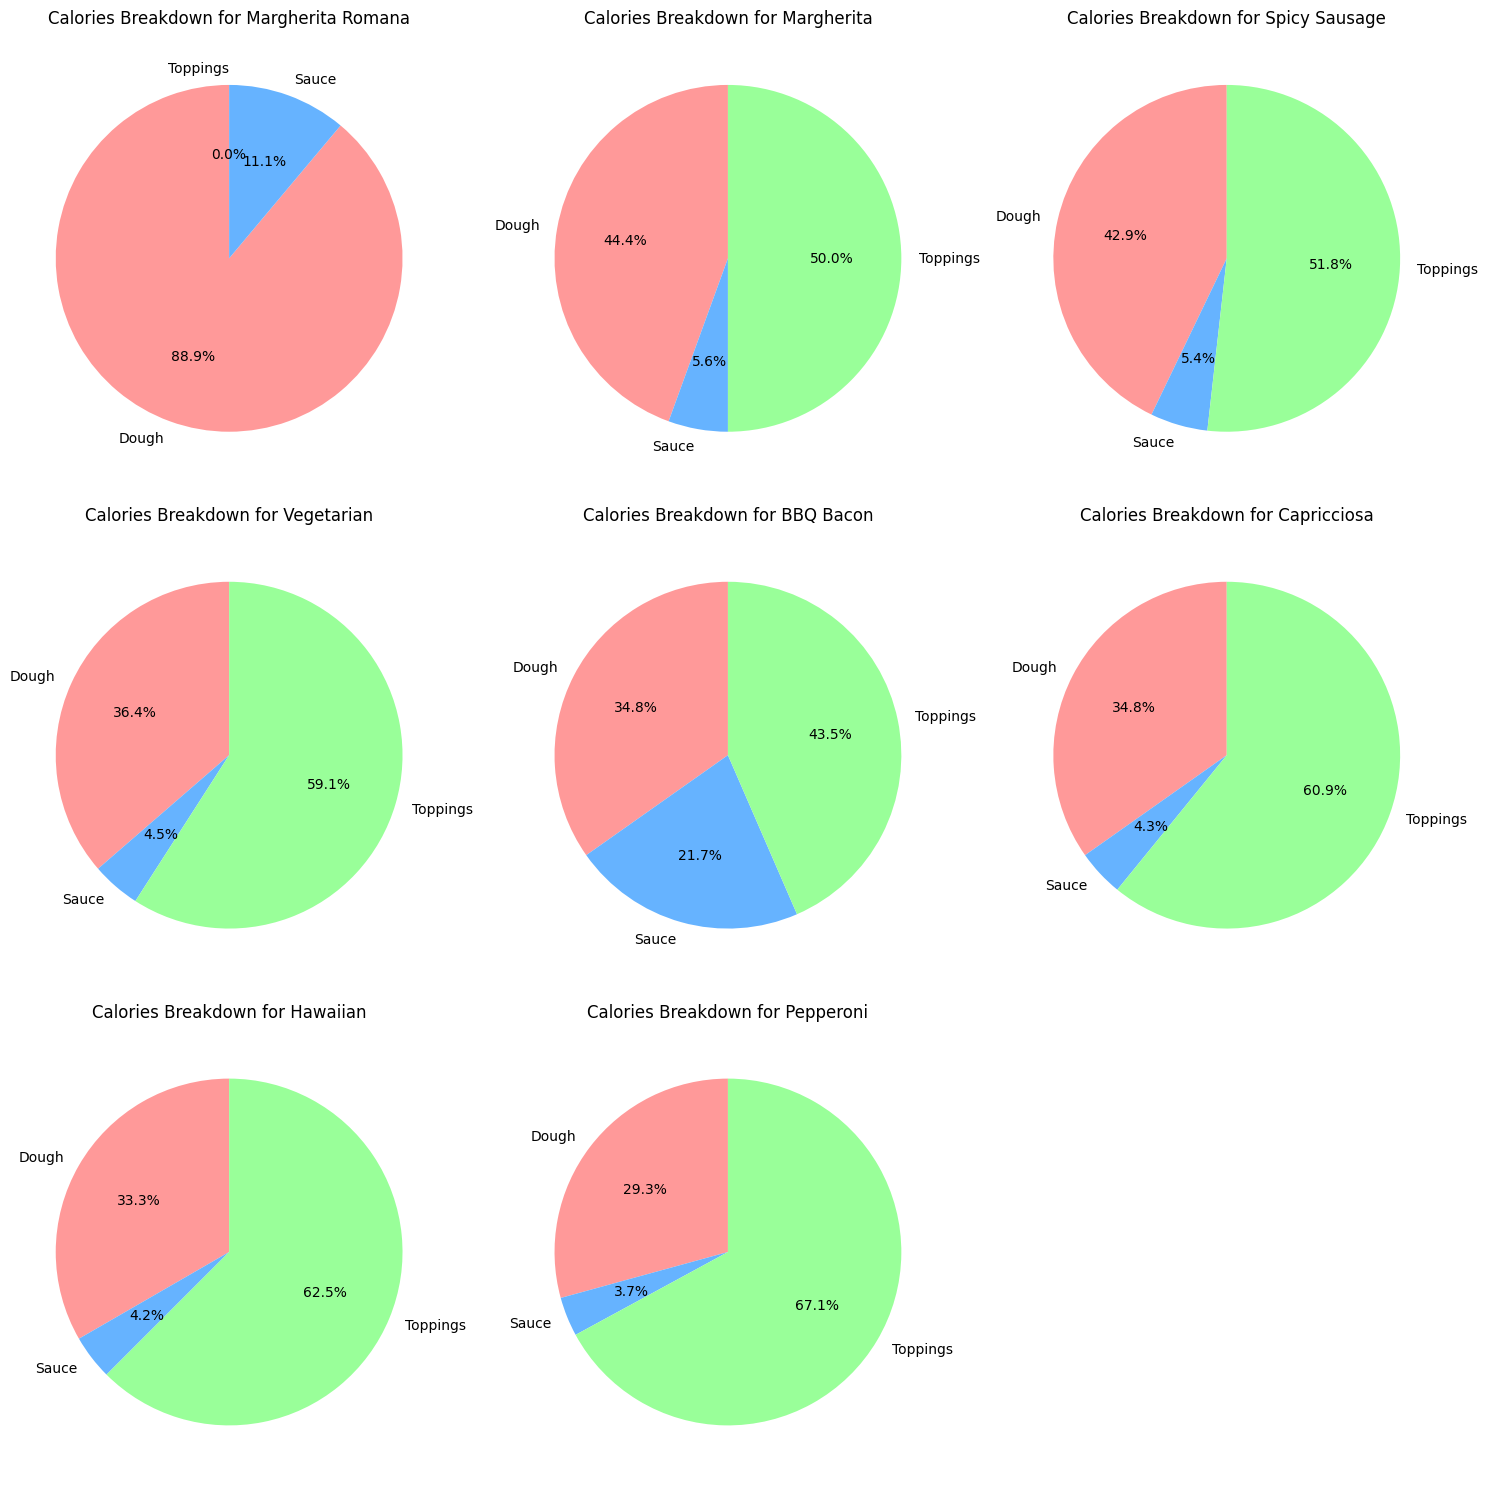

In [94]:
# Define the number of pizzas to plot (adjust as needed)
num_pizzas = 8

# Calculate the number of rows and columns needed for the subplots
ncols = 3  # Number of columns
nrows = (num_pizzas + ncols - 1) // ncols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate over each pizza up to the specified number
for idx, (i, row) in enumerate(pizzas_with_calories.head(num_pizzas).iterrows()):
    ax = axes[idx]  # Select subplot
    
    # Prepare data for the pie chart
    sizes = [row['dough_calories'], row['sauce_calories'], row['toppings_calories']]
    labels = ['Dough', 'Sauce', 'Toppings']
    colors = ['#ff9999', '#66b3ff', '#99ff99']  # Custom colors for each slice
    
    # Plot the pie chart
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Calories Breakdown for {row["name"]}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Hide unused subplots if there are any
for i in range(num_pizzas, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
